In [28]:
import pandas as pd
import numpy as np

data = {
    'age': ['<=30', '<=30', '31…40', '>40', '>40', '>40', '31…40', '<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

# Print the DataFrame
df


,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31…40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31…40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [2]:
# Calculating the entropy of the class label 'buys_computer'
import math
def calculate_entropy(data):
    total_samples = len(data)
    if total_samples == 0:
        return 0
    positive_samples = sum(data['buys_computer'] == 'yes')
    negative_samples = sum(data['buys_computer'] == 'no')
    p_positive = positive_samples / total_samples
    p_negative = negative_samples / total_samples
    if p_positive == 0 or p_negative == 0:
        return 0
    entropy = -p_positive * math.log2(p_positive) - p_negative * math.log2(p_negative)
    return entropy


In [3]:
entropy_root = calculate_entropy(df)
print(entropy_root)

0.9402859586706311


In [4]:
def calculate_information_gain(data, attribute, root_entropy):
    unique_values = data[attribute].unique()
    weighted_entropy_after_split = 0
    for value in unique_values:
        subset = data[data[attribute] == value]
        subset_entropy = calculate_entropy(subset)
        weight = len(subset) / len(data)
        weighted_entropy_after_split += weight * subset_entropy
    information_gain = root_entropy - weighted_entropy_after_split
    return information_gain


In [6]:
root_entropy = calculate_entropy(df)
print(root_entropy)

0.9402859586706311


In [7]:
information_gains = {}
for attribute in df.columns[:-1]:  # Exclude the 'buys_computer' column
    information_gain = calculate_information_gain(df, attribute, root_entropy)
    information_gains[attribute] = information_gain
# Identifying the attribute with the highest Information Gain as the root node
root_node = max(information_gains, key=information_gains.get)
print("Information Gains:")
for attribute, gain in information_gains.items():
    print(f"{attribute}: {gain}")
print(f"\nRoot Node (Highest Information Gain): {root_node}")

Information Gains:
age: 0.24674981977443933
income: 0.02922256565895487
student: 0.15183550136234159
credit_rating: 0.04812703040826949

Root Node (Highest Information Gain): age


In [29]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode each categorical column in the DataFrame
categorical_columns = ['age', 'income', 'student', 'credit_rating', 'buys_computer']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Print the DataFrame with numerical values
print(df)

    age  income  student  credit_rating  buys_computer
0     1       0        0              1              0
1     1       0        0              0              0
2     0       0        0              1              1
3     2       2        0              1              1
4     2       1        1              1              1
5     2       1        1              0              0
6     0       1        1              0              1
7     1       2        0              1              0
8     1       1        1              1              1
9     2       2        1              1              1
10    1       2        1              0              1
11    0       2        0              0              1
12    0       0        1              1              1
13    2       2        0              0              0


In [30]:
# make features and label seperately
x=df.drop("buys_computer",axis=1)
y=df["buys_computer"]

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [32]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

# score on train data
model.score(x_train,y_train)

1.0

Question A2

In [33]:
# Depth of a tree
depth_of_tree=model.get_depth()
print(depth_of_tree)

3


In [34]:
# Predict the labels
y_preds=model.predict(x_test.values)
y_preds

C:\Users\deven\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1, 0, 1, 1])

In [35]:
from sklearn.metrics import confusion_matrix,classification_report

decession_matrix=confusion_matrix(y_test,y_preds)
decession_report = classification_report(y_test,y_preds)

In [36]:
print(decession_matrix)

[[0 1]
 [1 2]]


In [37]:
print(decession_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.67      0.67         3

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4



In [38]:
# Function for calculating the Evaluation metrics

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def evaluate_preds(y_true,y_preds):
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = { "accuracy": round(accuracy,2),
                   "precision" : round(precision,2),
                  "recall": round(recall,2),
                  "f1":round(f1,2)}
    print(f"Acc       : {accuracy*100:.2f}%")
    print(f"Precision : {precision*100:.2f}%")
    print(f"Recall    : {recall*100:.2f}%")
    print(f"F1_score  : {f1*100:.2f}%")
    return metric_dict

In [39]:
metrics = evaluate_preds(y_test,y_preds)
metrics

Acc       : 50.00%
Precision : 66.67%
Recall    : 66.67%
F1_score  : 66.67%


{'accuracy': 0.5, 'precision': 0.67, 'recall': 0.67, 'f1': 0.67}

A3

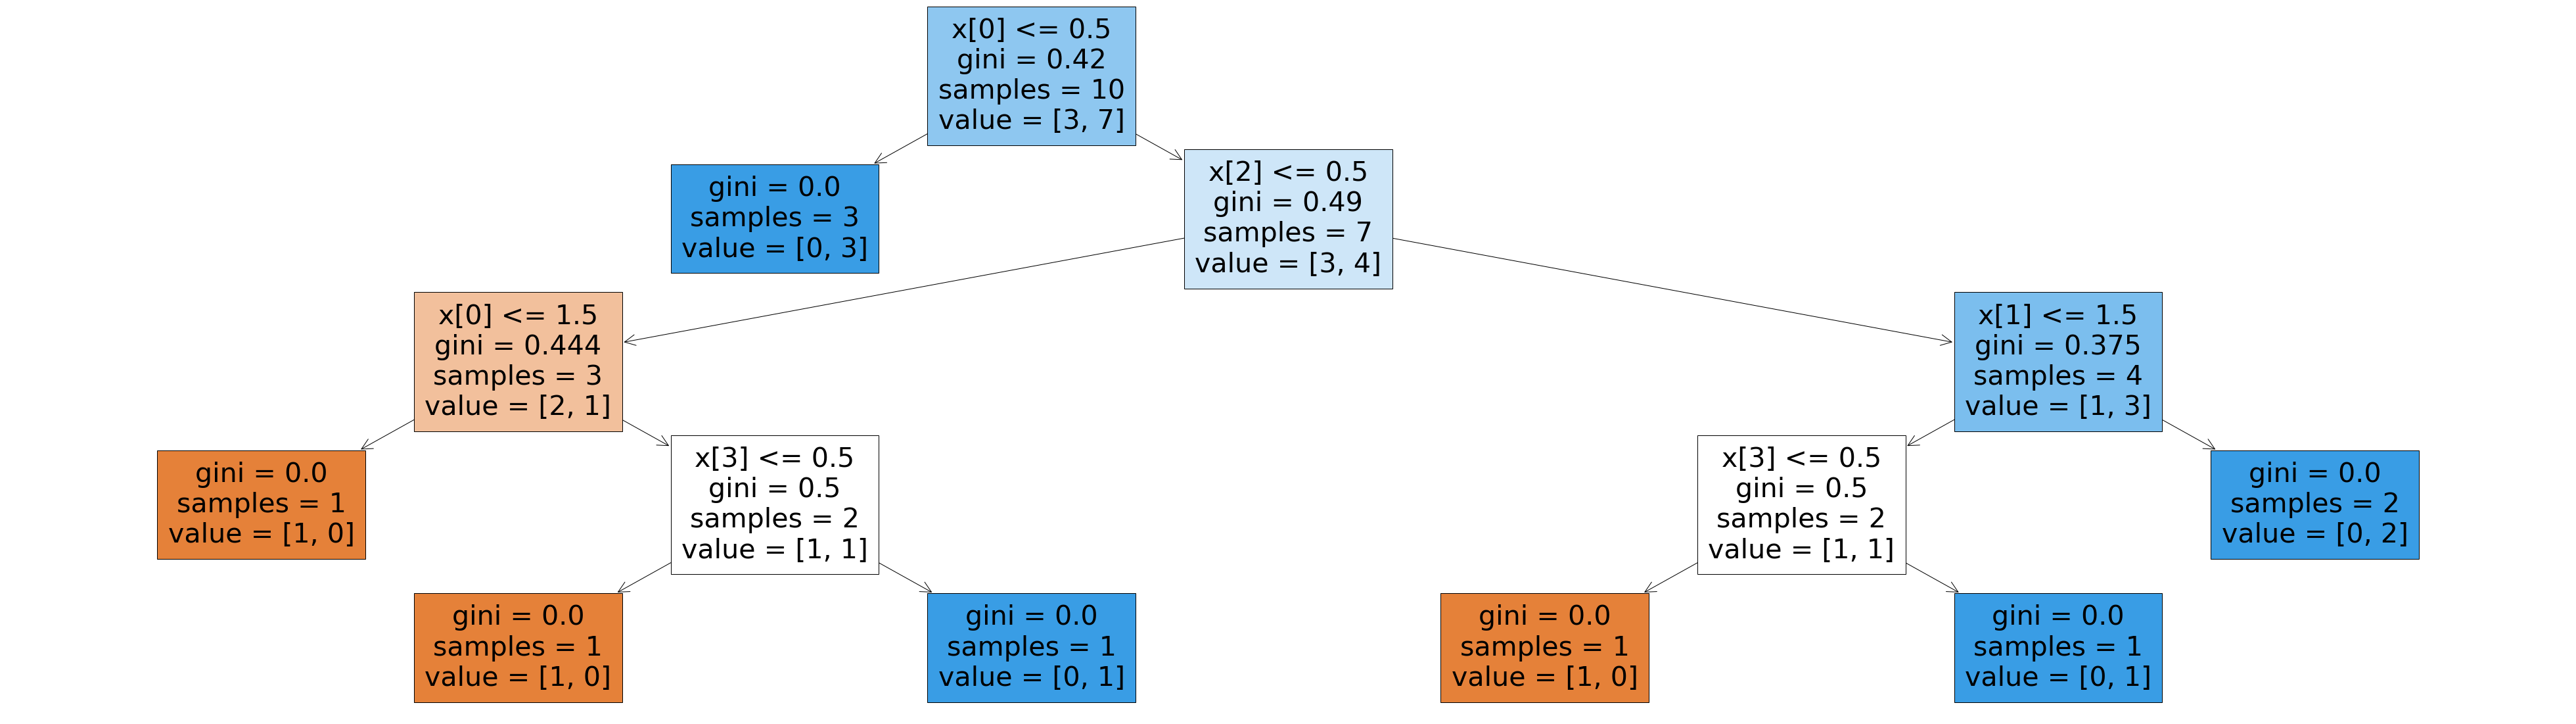

In [19]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(70, 20))
from sklearn.tree import plot_tree 
plot_tree(model, filled=True)
plt.show()

 A4

In [20]:
import pandas as pd
import numpy as np
df=pd.read_excel("dataset_final.xlsx")
df.head()

,serial_no,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,...,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label,fname
0,1,33.571474,37.613824,30.087053,37.102539,0.771983,0.746361,0.809737,0.747152,0.341245,...,0.036918,0.030155,0.037329,0.029864,0.192141,0.173651,0.193207,0.172812,0,without_mask_1.jpg
1,2,18.461546,25.806718,25.655944,26.883562,0.797231,0.627642,0.614348,0.586758,0.081968,...,0.000190,0.000158,0.000198,0.000165,0.013800,0.012556,0.014080,0.012841,0,without_mask_10.jpg
2,3,17.975612,24.888646,23.639344,23.941351,0.800654,0.667611,0.716540,0.705741,0.094696,...,0.000161,0.000127,0.000132,0.000130,0.012707,0.011277,0.011473,0.011389,0,without_mask_100.jpg
3,4,11.001795,11.536333,9.729197,11.648599,0.869841,0.866218,0.894534,0.856053,0.638126,...,0.343982,0.346157,0.359534,0.345615,0.586500,0.588351,0.599612,0.587890,0,without_mask_1000.jpg
4,5,15.650286,17.982019,18.060362,17.958789,0.854187,0.811520,0.816796,0.805573,0.101942,...,0.000241,0.000221,0.000243,0.000219,0.015534,0.014856,0.015576,0.014787,0,without_mask_1001.jpg


In [21]:
df.drop("fname",axis=1,inplace=True)

In [22]:
from sklearn.model_selection import train_test_split
x = df.drop("label",axis=1)
y = df["label"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
model_basic = DecisionTreeClassifier()
model_basic.fit(x_train,y_train)

# score on train data
print(f"The score on training data :{ model_basic.score(x_train,y_train)}")

# score on test data
print(f"The score on training data :{ model_basic.score(x_test,y_test)}")

The score on training data :1.0
The score on training data :1.0


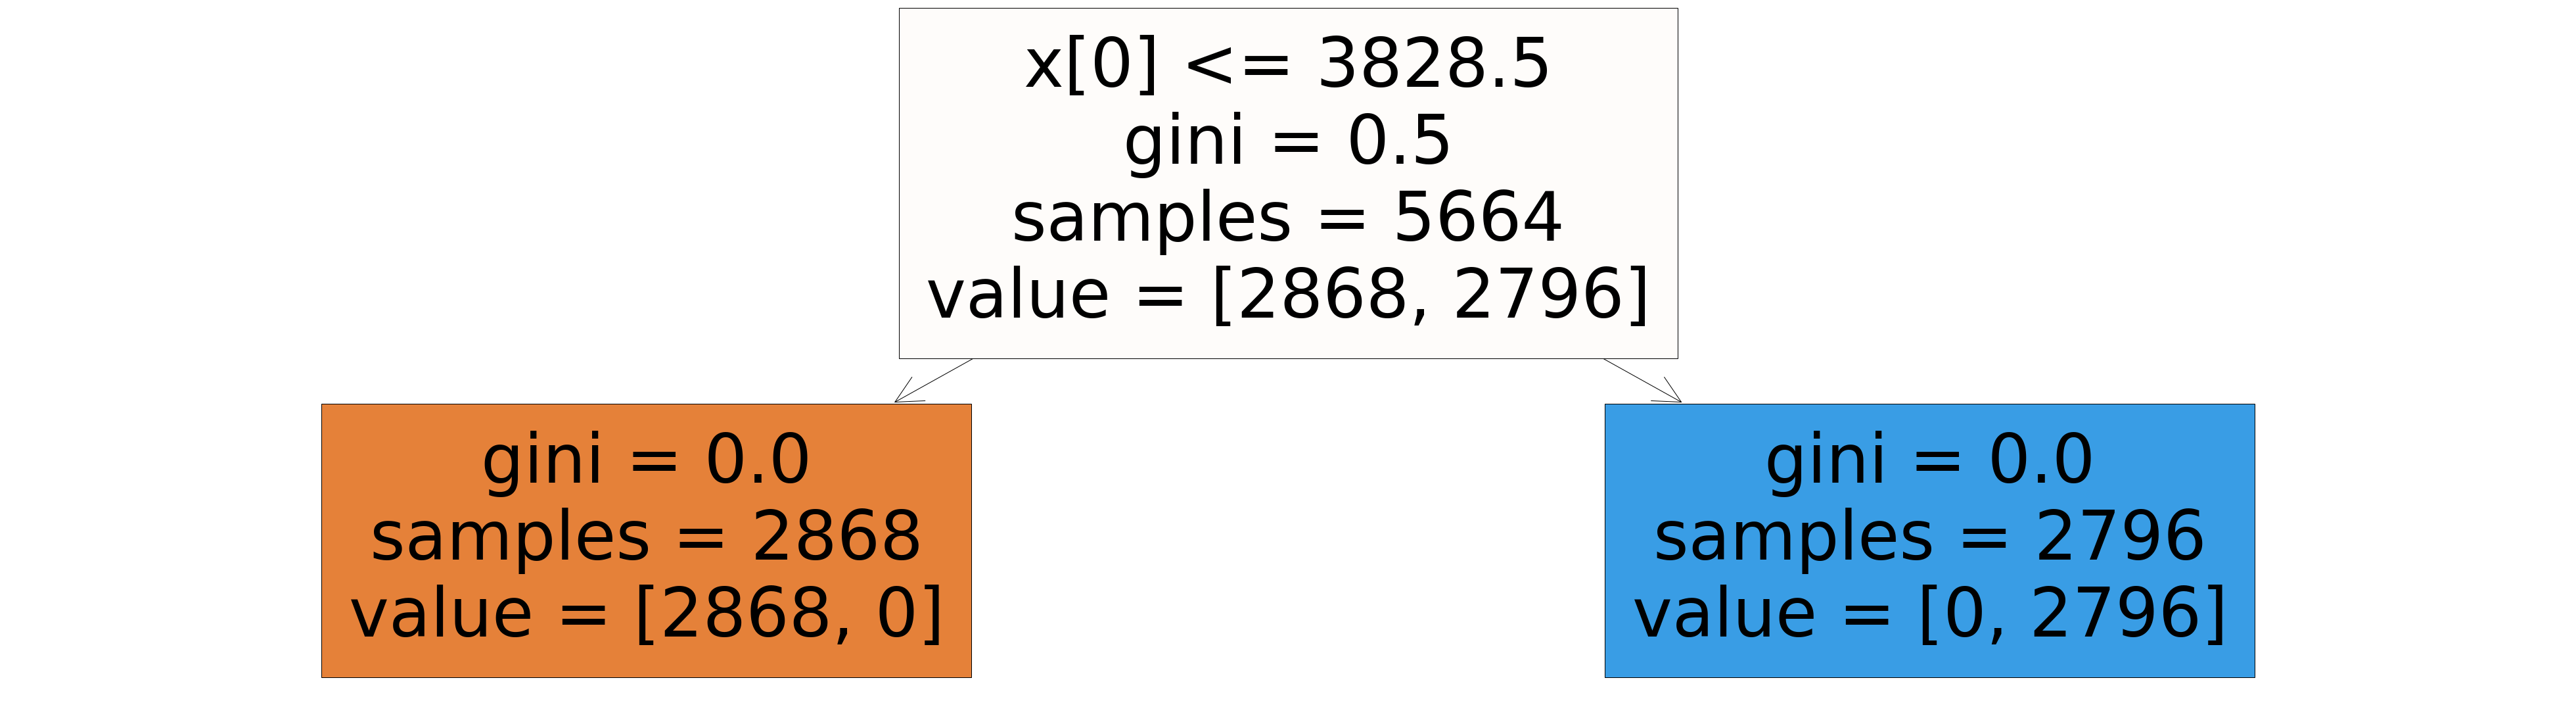

In [23]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(70, 20))
from sklearn.tree import plot_tree 
plot_tree(model_basic, filled=True)
plt.show()

 A5

In [24]:
model_improved = DecisionTreeClassifier(max_depth=5)
model_improved.fit(x_train,y_train)
# score on train data
print(f"The score on training data :{ model_improved.score(x_train,y_train)}")

# score on test data
print(f"The score on training data :{ model_improved.score(x_test,y_test)}")

The score on training data :1.0
The score on training data :1.0


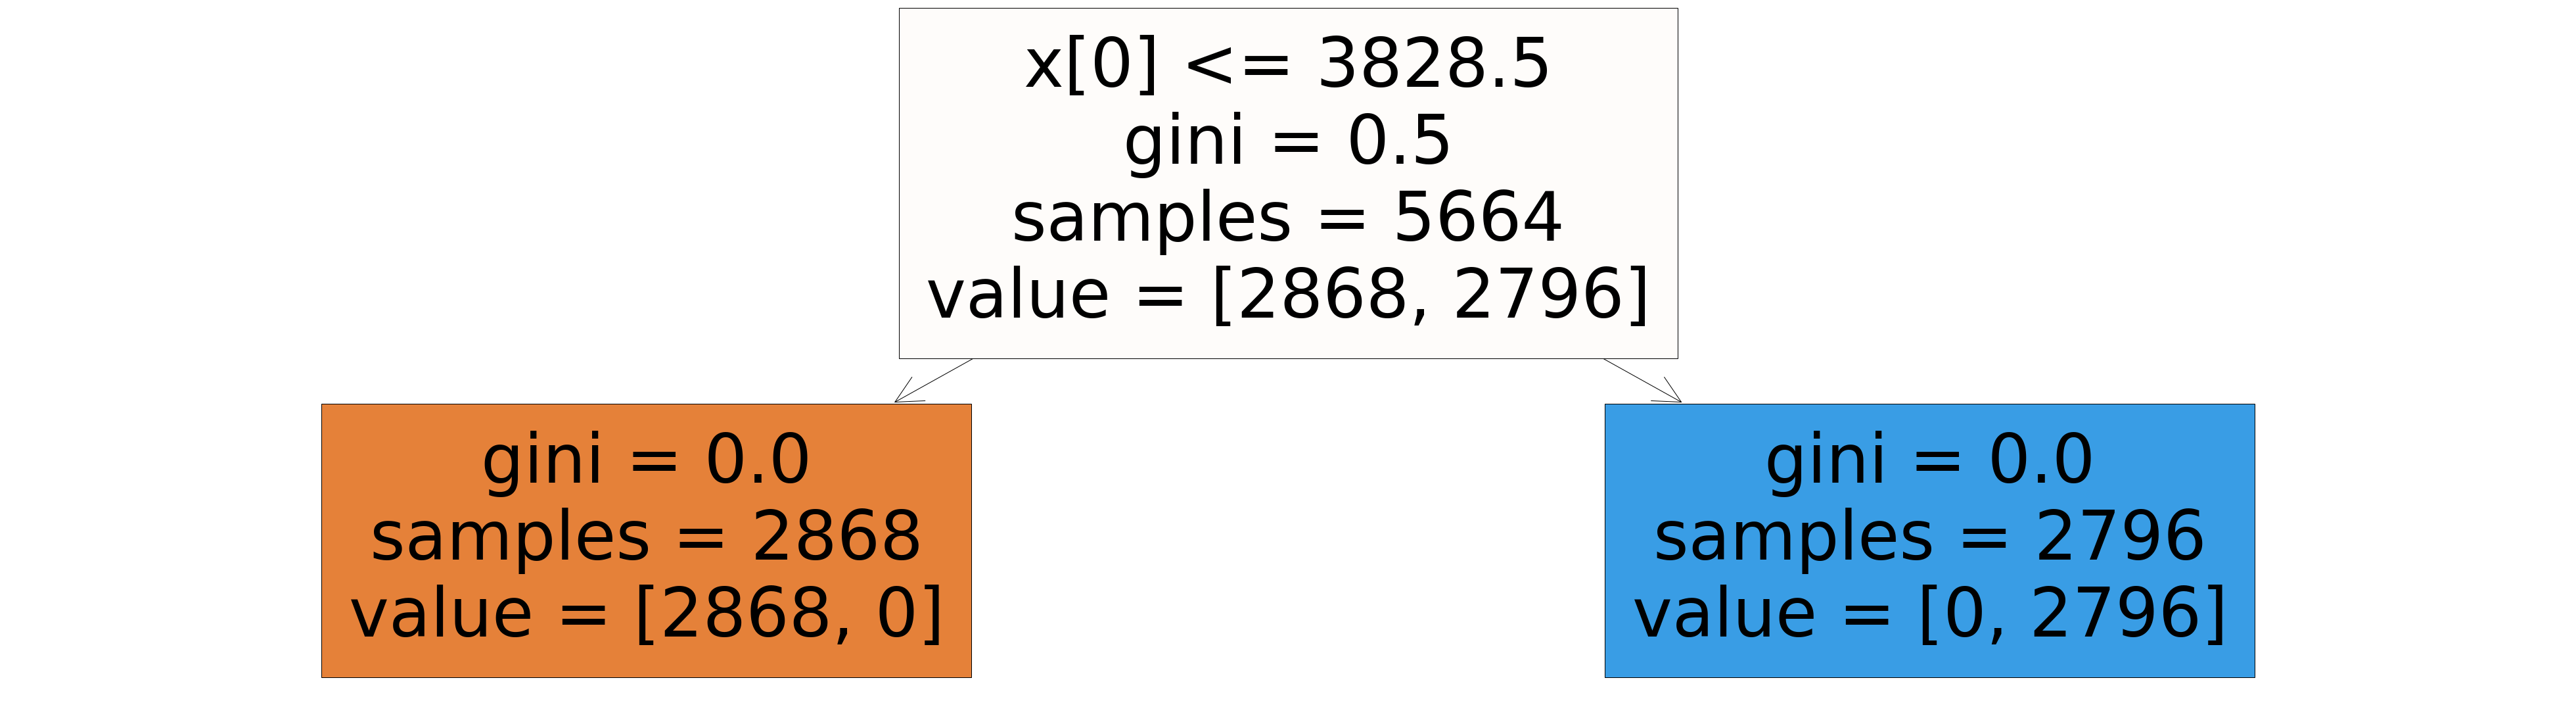

In [25]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(70, 20))
from sklearn.tree import plot_tree 
plot_tree(model_improved, filled=True)
plt.show()

6

In [26]:
model_entropy = DecisionTreeClassifier(criterion="entropy")
model_entropy.fit(x_train,y_train)
# score on train data
print(f"The score on training data :{ model_entropy.score(x_train,y_train)}")

# score on test data
print(f"The score on training data :{ model_entropy.score(x_test,y_test)}")

The score on training data :1.0
The score on training data :1.0


 7

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
print(f"The score on training data :{ clf.score(x_train,y_train)}")

# score on test data
print(f"The score on training data :{ clf.score(x_test,y_test)}")

The score on training data :1.0
The score on training data :1.0


hyper parmameters of Random Fores:

* max_depth
* max_features
* min_sample_leaf
* min_samples_split
* n_estimators